In [28]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
from matplotlib import pyplot as plt

In [29]:
df = pd.read_csv('50yr earthquake data peninsular India.csv')

In [30]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-05-26T05:09:10.629Z,23.2123,86.8925,10.00,4.7,mb,NaN,99.0,6.208,0.66,...,2019-06-22T10:15:08.897Z,"18km WSW of Bankura, India",earthquake,6.5,1.9,0.066,69.0,reviewed,us,us
1,2019-02-12T01:32:27.310Z,14.3974,85.7300,10.00,4.9,mb,NaN,78.0,7.358,0.83,...,2019-05-01T22:00:34.040Z,Bay of Bengal,earthquake,5.4,1.6,0.068,68.0,reviewed,us,us
2,2018-09-01T18:09:55.250Z,23.4903,82.4460,10.00,4.7,mb,NaN,78.0,9.928,0.97,...,2018-11-07T18:37:08.040Z,"28km NNW of Baikunthpur, India",earthquake,9.2,1.9,0.061,81.0,reviewed,us,us
3,2018-08-28T13:03:27.670Z,22.6926,87.7938,10.00,4.5,mb,NaN,93.0,4.685,0.60,...,2018-11-07T18:37:03.040Z,"8km ENE of Ghatal, India",earthquake,9.1,1.9,0.139,15.0,reviewed,us,us
4,2014-05-21T16:21:54.350Z,18.2012,88.0376,47.23,6.0,mww,NaN,38.0,5.590,0.63,...,2015-01-28T16:02:10.607Z,"276km SE of Konarka, India",earthquake,NaN,3.7,NaN,NaN,reviewed,us,us


In [31]:
df['year'] = df.time.apply(lambda x : x.split(sep = '-')[0])
df['month'] = df.time.apply(lambda x : x.split(sep = '-')[1])

In [32]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month
0,2019-05-26T05:09:10.629Z,23.2123,86.8925,10.00,4.7,mb,NaN,99.0,6.208,0.66,...,earthquake,6.5,1.9,0.066,69.0,reviewed,us,us,2019,05
1,2019-02-12T01:32:27.310Z,14.3974,85.7300,10.00,4.9,mb,NaN,78.0,7.358,0.83,...,earthquake,5.4,1.6,0.068,68.0,reviewed,us,us,2019,02
2,2018-09-01T18:09:55.250Z,23.4903,82.4460,10.00,4.7,mb,NaN,78.0,9.928,0.97,...,earthquake,9.2,1.9,0.061,81.0,reviewed,us,us,2018,09
3,2018-08-28T13:03:27.670Z,22.6926,87.7938,10.00,4.5,mb,NaN,93.0,4.685,0.60,...,earthquake,9.1,1.9,0.139,15.0,reviewed,us,us,2018,08
4,2014-05-21T16:21:54.350Z,18.2012,88.0376,47.23,6.0,mww,NaN,38.0,5.590,0.63,...,earthquake,NaN,3.7,NaN,NaN,reviewed,us,us,2014,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1980-09-20T10:45:32.000Z,17.3120,73.5840,33.00,5.3,mb,NaN,NaN,NaN,NaN,...,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1980,09
129,1980-09-20T07:28:57.700Z,17.1580,73.7970,33.00,4.9,mb,NaN,NaN,NaN,NaN,...,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1980,09
130,1980-09-02T16:39:14.000Z,17.1790,73.7070,33.00,5.5,ms,NaN,NaN,NaN,NaN,...,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1980,09
131,1980-03-30T13:31:53.000Z,17.1640,81.9670,33.00,4.5,mb,NaN,NaN,NaN,NaN,...,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1980,03


In [33]:
df2 = pd.DataFrame(df.groupby(['year', 'month']).count().loc[:, 'latitude'])

In [34]:
df2.head(20)

latitude
year month          
1976 06            1
1980 03            1
     09            3
     10            1
1981 04            1
1982 04            1
     07            1
1983 09            1
1984 04            1
     11            1
1985 07            1
1986 01            1
1987 04            1
     12            1
1991 01            1
1992 01            1
     12            1
1993 05            1
     08            2
     09            5

In [35]:
df2.rename({'latitude' : 'no_earthquake'}, axis = 1, inplace = True)

In [36]:
df2

no_earthquake
year month               
1976 06                 1
1980 03                 1
     09                 3
     10                 1
1981 04                 1
...                   ...
2014 05                 1
2018 08                 1
     09                 1
2019 02                 1
     05                 1

[72 rows x 1 columns]

In [37]:
df2.reset_index(inplace = True)

In [38]:
df2

,year,month,no_earthquake
0,1976,06,1
1,1980,03,1
2,1980,09,3
3,1980,10,1
4,1981,04,1
...,...,...,...
67,2014,05,1
68,2018,08,1
69,2018,09,1
70,2019,02,1


In [39]:
df2.groupby('year').mean().mean()

no_earthquake    1.316146
dtype: float64

In [40]:
rate = df2.groupby('year').mean().mean()
x = np.arange(0, 10, 1)
poisson = poisson.pmf(x, rate)

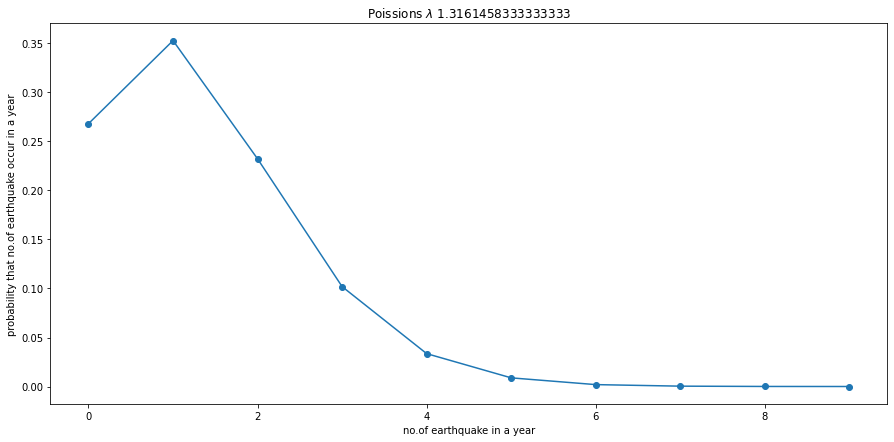

In [43]:
plt.figure(figsize=(15, 7))
plt.plot(x, poisson, 'o-')
plt.title(f'Poissions $\lambda$ {rate[0]}')
plt.xlabel('no.of earthquake in a year')
plt.ylabel('probability that no.of earthquake occur in a year')
plt.show()